# O que é a Rede Neural (MLP)?
A Rede Neural é como um cérebro de computador que aprende a partir de exemplos. Ela olha para as características dos diamantes e tenta descobrir qual é o padrão que faz o preço ser maior ou menor. Ela é muito boa em perceber coisas que são bem complicadas e difíceis de ver a olho nu.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/diamonds.csv")

In [3]:
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
7950,7951,0.65,Ideal,D,VVS1,61.9,56.0,4320,5.53,5.56,3.43
6334,6335,1.00,Premium,H,SI2,61.0,57.0,4032,6.51,6.40,3.94
4847,4848,0.71,Ideal,F,VS1,60.8,56.0,3710,5.81,5.82,3.54
19908,19909,1.65,Ideal,E,SI2,58.7,56.0,8455,7.76,7.73,4.55
20418,20419,1.06,Ideal,F,VVS2,61.1,57.0,8776,6.62,6.57,4.03
53527,53528,0.76,Ideal,H,VVS2,61.8,57.0,2690,5.84,5.91,3.63
39159,39160,0.35,Premium,E,VS1,60.8,58.0,1063,4.58,4.55,2.78
21580,21581,1.33,Premium,G,VS2,58.6,61.0,9682,7.21,7.17,4.21
19843,19844,1.13,Ideal,E,VS2,62.0,54.0,8404,6.70,6.66,4.14
16628,16629,1.07,Ideal,G,VS2,62.4,55.0,6648,6.53,6.58,4.09


In [4]:
df = df.drop(['Unnamed: 0','x', 'y','z'], axis=1)

In [5]:
# Definindo as colunas categóricas e numéricas
categorical_columns = ['cut', 'color', 'clarity']
numeric_columns = ['carat', 'depth', 'table']

# Definindo as ordens para o OrdinalEncoder
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [ ]:
# Separando variável dependente (price) e independentes
X = df.drop('price', axis=1)
y = df['price']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o pré-processamento para variáveis categóricas e numéricas dentro do ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),  # Escala as variáveis numéricas
        ('cat', OrdinalEncoder(categories=[cut_order, color_order, clarity_order]), categorical_columns)  # Codifica as variáveis categóricas
    ])

# Criando o Pipeline com pré-processamento e modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500   k, random_state=42))
])

# Treinando o modelo com o Pipeline
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table']),
                                                 ('cat',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500,
                              random_state=42))])

In [9]:
# Avaliando o modelo
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 578.86
MSE: 335075.82
R² Score: 0.98


# 1. Gráfico de Erro Residual

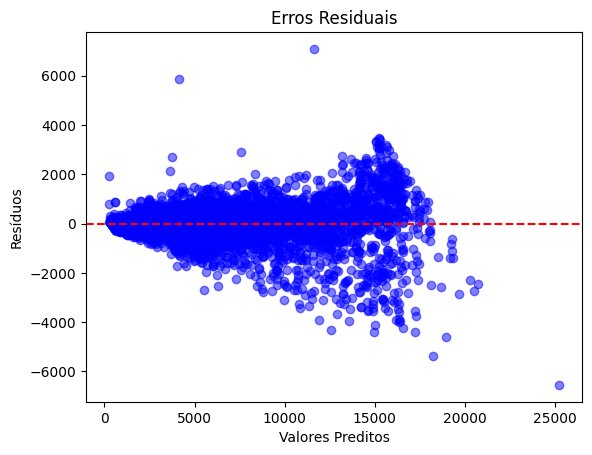

In [11]:
# Calculando os resíduos (erro)
residuals = y_test - y_pred

# Gráfico de erro residual
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Erros Residuais")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.show()

- Este gráfico mostra a diferença entre os valores reais e os valores previstos. Quanto mais próximos de zero estiverem os erros, melhor.

# 2. Histograma dos Erros

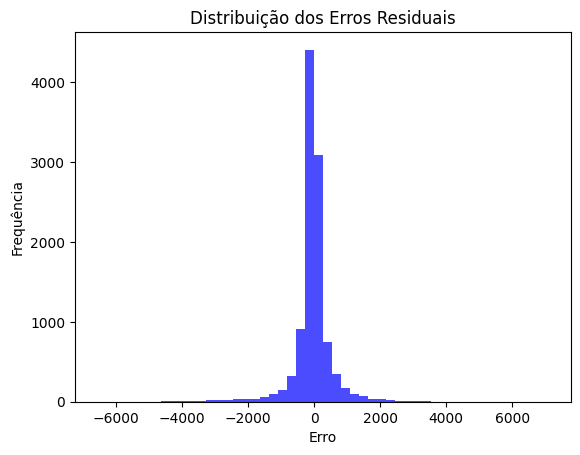

In [12]:
# Histograma dos resíduos
plt.hist(residuals, bins=50, color='blue', alpha=0.7)
plt.title("Distribuição dos Erros Residuais")
plt.xlabel("Erro")
plt.ylabel("Frequência")
plt.show()

- Esse gráfico mostra a distribuição dos erros. Se o modelo for bom, os erros devem estar distribuídos de forma aleatória em torno de zero.

# 3. Curva de Aprendizado

c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and 

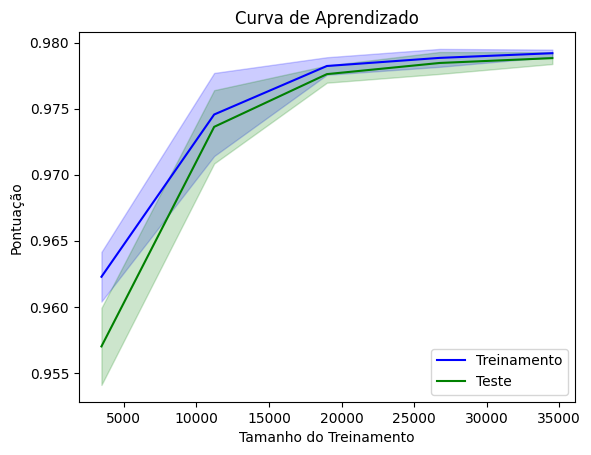

In [15]:
from sklearn.model_selection import learning_curve

# Gerando a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5)

# Média e desvio padrão para as pontuações de teste
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotando a curva de aprendizado
plt.plot(train_sizes, train_mean, label='Treinamento', color='blue')
plt.plot(train_sizes, test_mean, label='Teste', color='green')

# Exibindo a área sombreada para o intervalo de erro
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Treinamento")
plt.ylabel("Pontuação")
plt.legend()
plt.show()

- Este gráfico mostra como o modelo melhora durante o treinamento. Ele pode ser útil para ver se o modelo está subajustado (underfitting) ou sobreajustado (overfitting).

# 4. Gráfico de Dispersão - Valores Reais vs Preditos

R² do modelo: 0.978921835396066
RMSE: 578.8573392719479


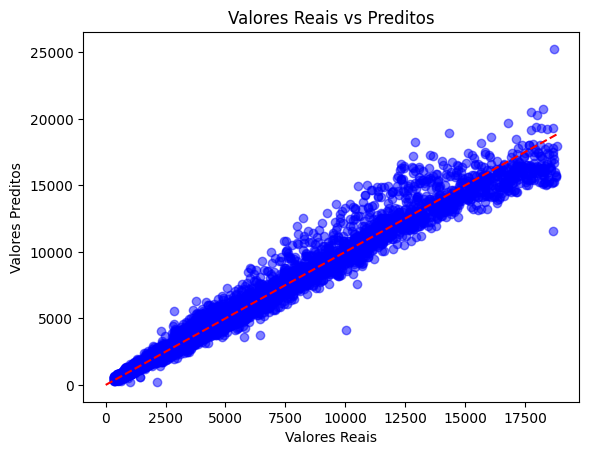

In [16]:
# Avaliação do modelo
score = pipeline.score(X_test, y_test)
print(f'R² do modelo: {score}')

# Realizando previsões
y_pred = pipeline.predict(X_test)

# Cálculo do erro médio quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Gráfico de dispersão - Valores Reais vs Preditos
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Linha de identidade
plt.title("Valores Reais vs Preditos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.show()


- Este gráfico ajuda a ver como os valores previstos se comparam aos valores reais. Quanto mais próximos da linha reta (linha de identidade) os pontos estiverem, melhor o modelo.

O modelo MLP provavelmente teve um desempenho melhor devido à sua capacidade de aprender padrões complexos e não lineares nas variáveis, o que é crucial para um problema como a previsão de preços de diamantes, onde várias interações não lineares podem estar em jogo. O SVM, por outro lado, poderia se beneficiar de um ajuste mais refinado dos hiperparâmetros ou até mesmo de uma abordagem diferente para lidar com esse tipo de dado.
